<a href="https://colab.research.google.com/github/sakathia/Data110/blob/main/Project/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Spotify Songs Popularity Analysis

## Introduction:
Spotify is a music/audio streaming app that allows its users to access a variety of songs and podcasts. This dataset covers the information and features of 2000 songs between the years 1998 through 2020. I chose this dataset because I am musically inclined and wanted to have an understanding of what attributes or features makes a song popular.



## EDA Process:
Since I wanted to understand what makes a song popular and also an understanding of the data provided, I will focus on looking at the distrubtion of popularity over the years and the relationships that a song's features has on song popularity. Therefore, I will start I will start with loading the dataset and seeing the top 5 rows to get an understanding of the data.


In [1]:
#Importing and reading the spotify songs dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Spotify_Songs = pd.read_csv("https://raw.githubusercontent.com/sakathia/Data110/refs/heads/main/dataset/spotifysongs.csv")
Spotify_Songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Then I wanted to see the shape of the data in terms of columns and rows.

In [2]:
Spotify_Songs.shape

(2000, 18)

From here we can see that there are 2000 rows corresponding to the number of songs and then 18 columns corresponding to the song attributes and features. Then, I also wanted to see a summary statistics to understand how the data is distributed along the attributes

In [3]:
Spotify_Songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


I also wanted to understand the data types of the variables to get an understand of which type of graph would be suitable for my analysis.

In [4]:
Spotify_Songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


I also wanted to check if there were any nulls in the data that would need to be removed so that they would not affect the analysis using `isnull()`. The results show that there are no nulls in the dataset that need to be taken care of.

In [5]:
Spotify_Songs.isnull().sum() #isnull checks if there are any null values in the data and the sum function sums up the nulls vlaues for each variable

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


Since a majority of the variables are numerical I wanted to see if there were trends for the corelation between the numerical variables. Therefore, I decided that a pairplot would be the best choice.

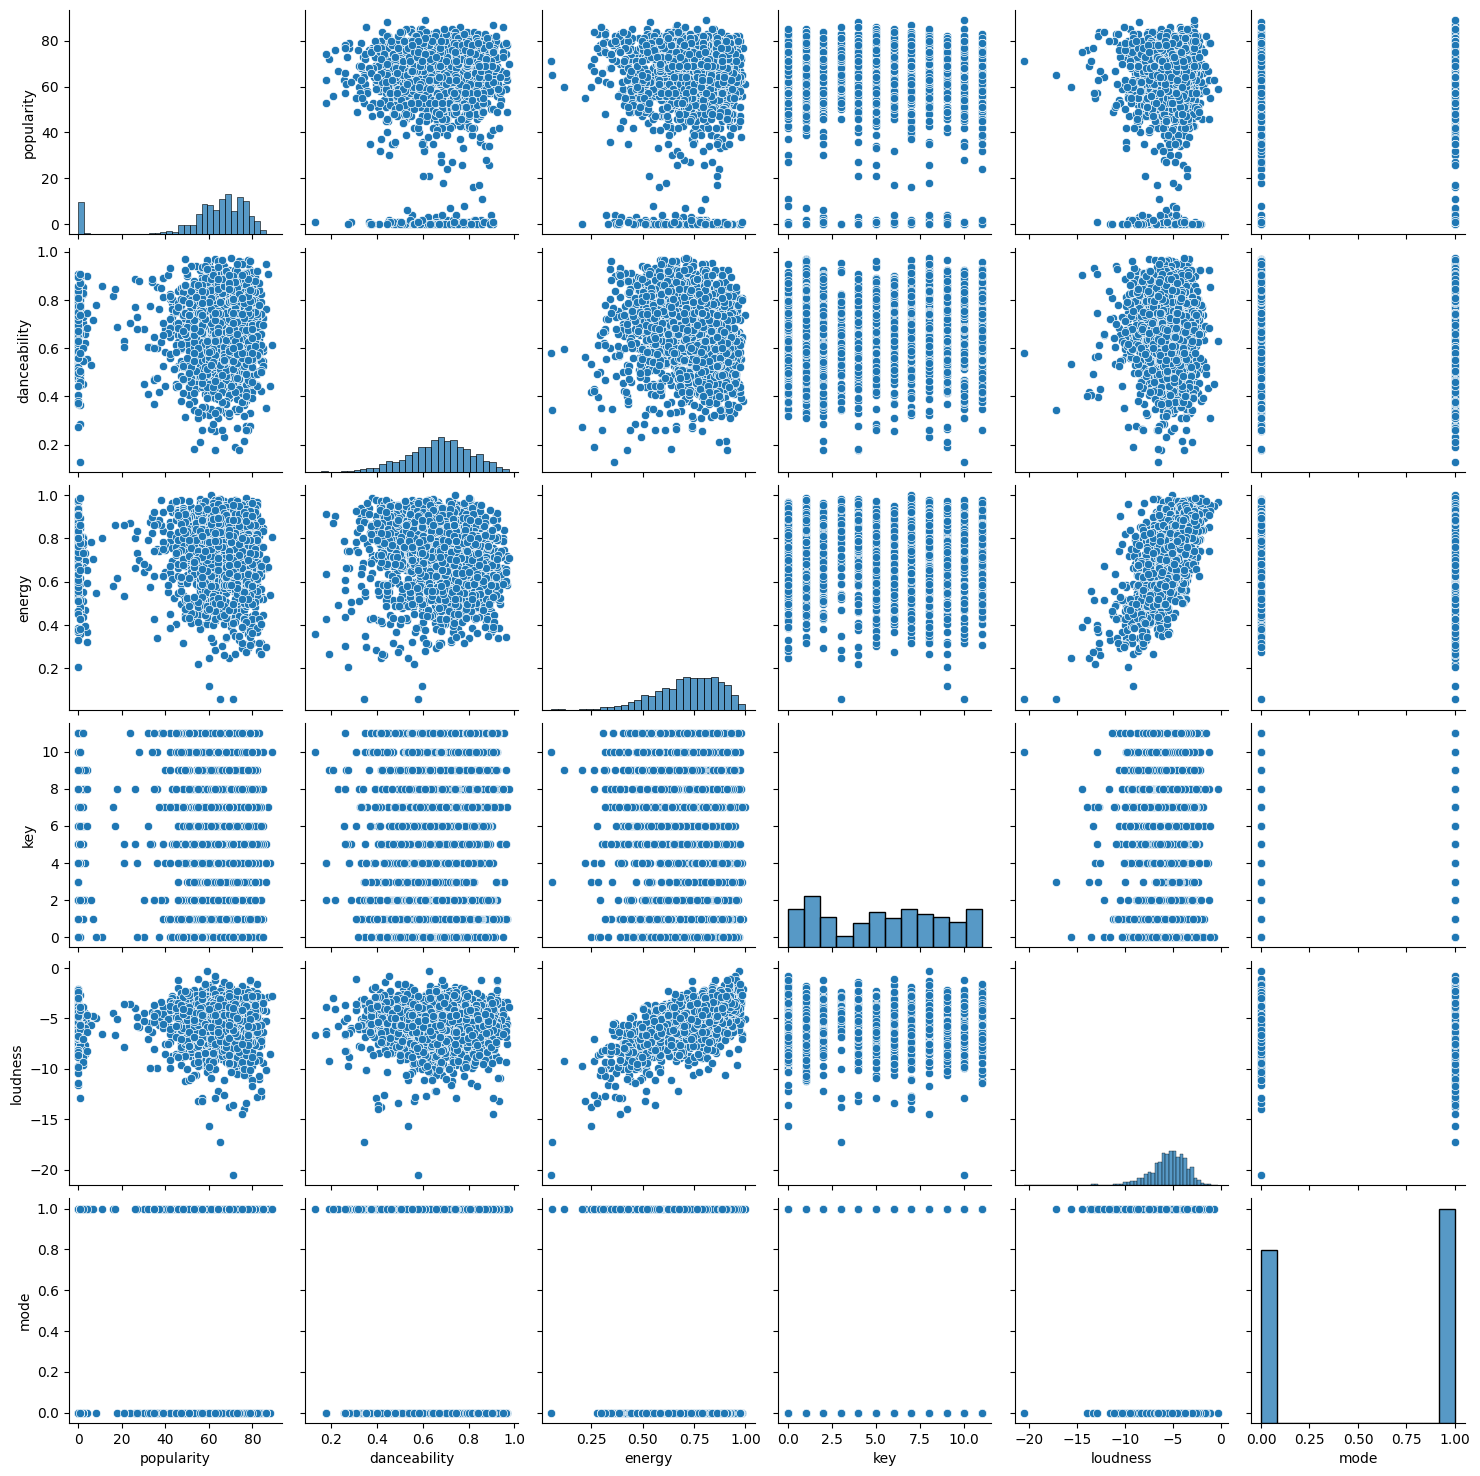

In [6]:
cols_select=Spotify_Songs.columns[5:11]
sns.pairplot(Spotify_Songs[cols_select])
plt.savefig('plot0.png')

From this pairplot I can see that there is not much correlation between the variables except for loudness and energy.

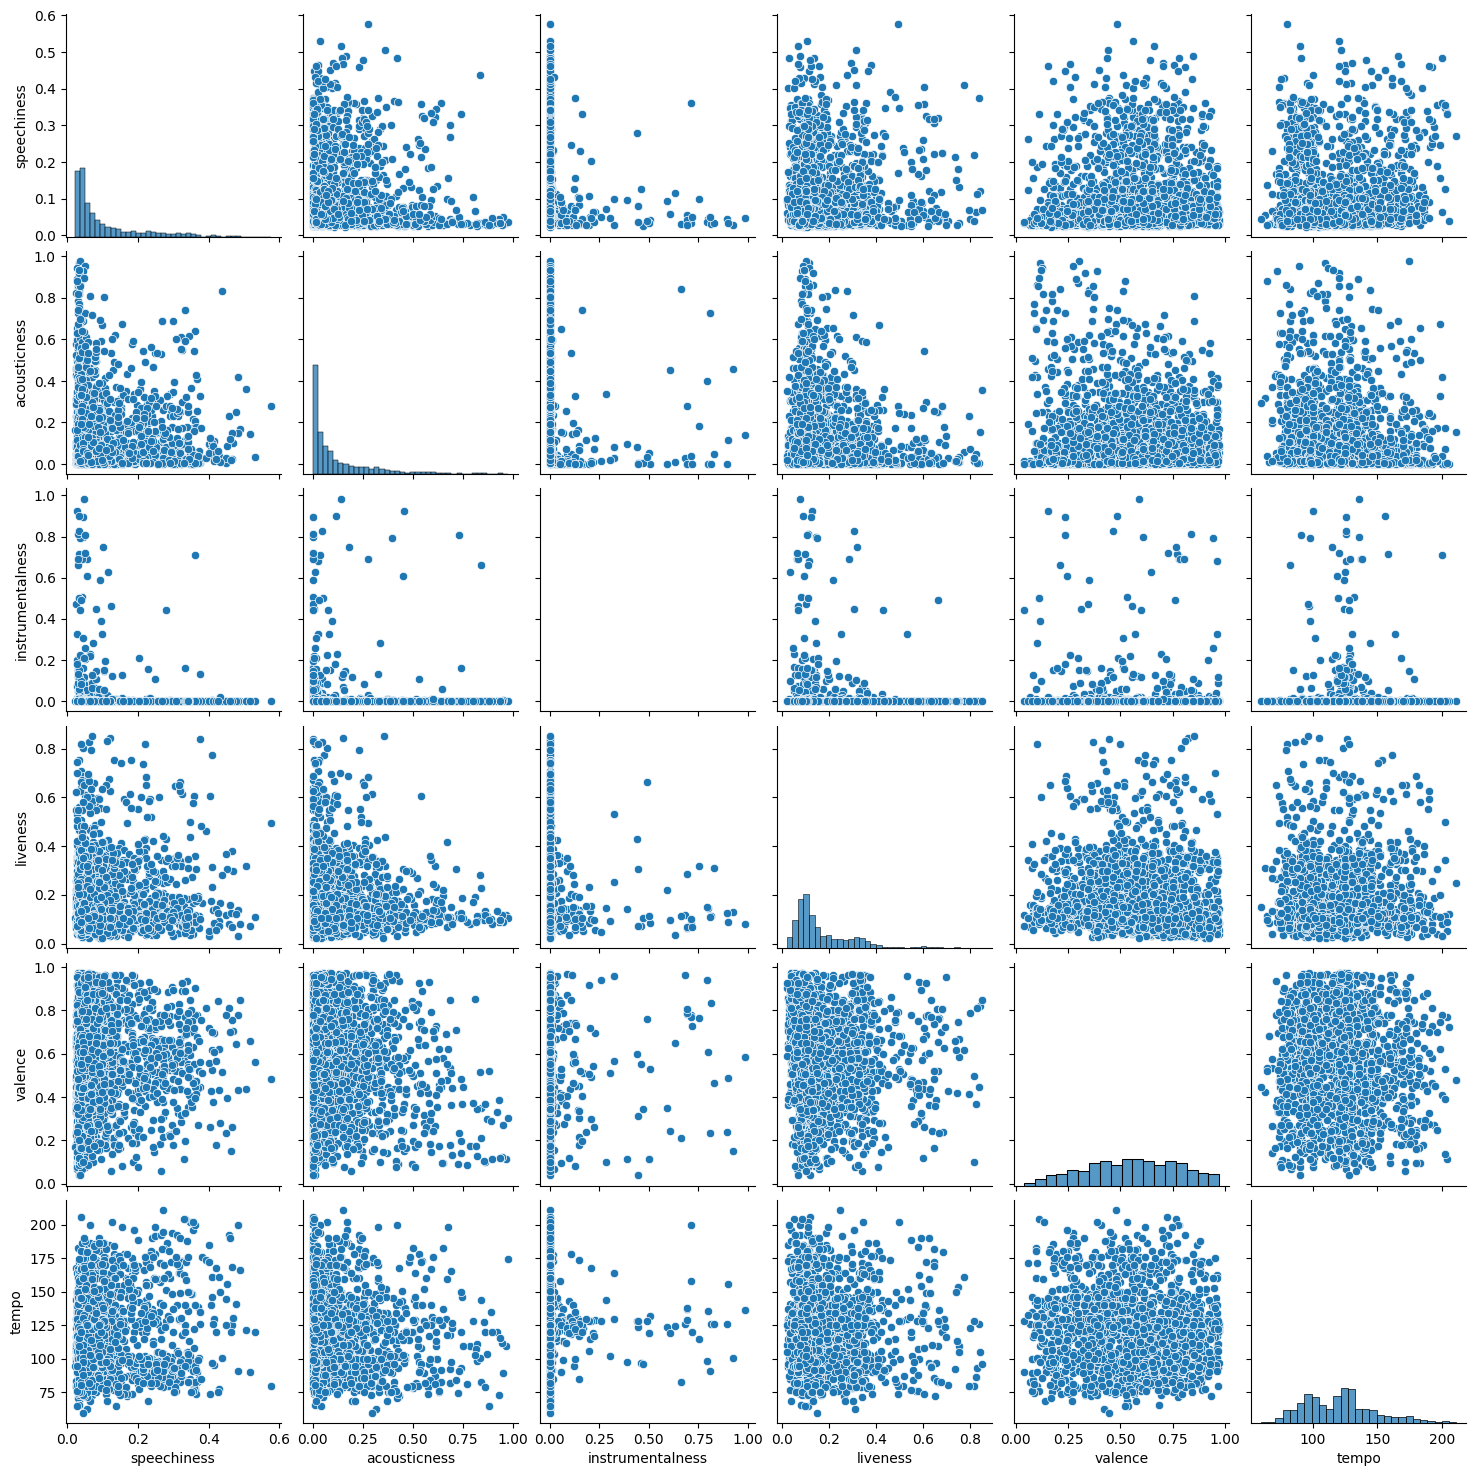

In [7]:
cols_select2=Spotify_Songs.columns[11:17]
sns.pairplot(Spotify_Songs[cols_select2])

I picked loudness and valence for the numerical variables to look to compare the correlation to popualrity. I also find that looking at the song distribution by year would be important to analyze and then looking at the popularity distribution. I will also use the style ggplot for the visualiztions.

In [8]:
plt.style.use('ggplot')

I am choosing to showcase the distribution of songs by year in a barplot since the data is not continuous for it to be displayed in a line graph and a scatterplot would not provide a cler insight of the number of songs by year as it would in a bar plot.

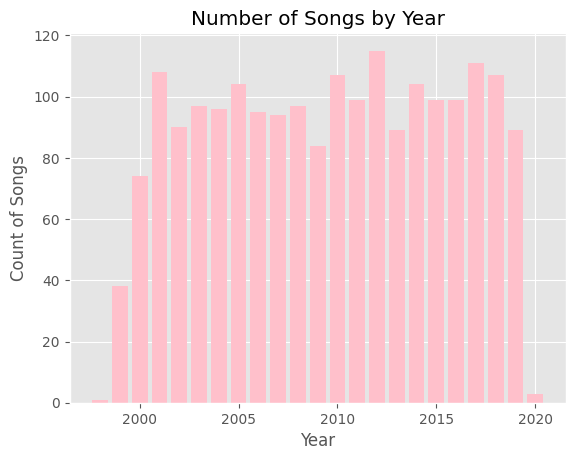

In [9]:
plt.bar(Spotify_Songs['year'].value_counts().sort_index().index, # This accesses the years and make sure they are displayed in ascending order
        Spotify_Songs['year'].value_counts().sort_index().values, color='pink') # This access the count of the songs by year and makes sure they are displayed in ascending order

plt.xlabel('Year')
plt.ylabel('Count of Songs')
plt.title('Number of Songs by Year')
plt.savefig('plot1.png')
plt.show()

In this barplot the insight we can see is that the distribution is somewhat evenly spread between the years 1998 and 2020. This indictates that Spotify's music offerings for streaming caters not only to one specific audience but wants to cater to a variety of audiences providing a more comprehensive library that users can choose from. The year with the highest number of songs was 2013 with some high peaks in other years possibly indicating that there may have been years where songs were not as popular or released as frequently as other years. It is also important to note that there is data missing from 2021-2024 meaning that there could be some data missing to inform on current song popularity trends.

Then, I am choosing to analyze the relationship between loudness and popularity and visualize it in a scatterplot as it would be the best choice to show if there is a correlation between two numerical variables.

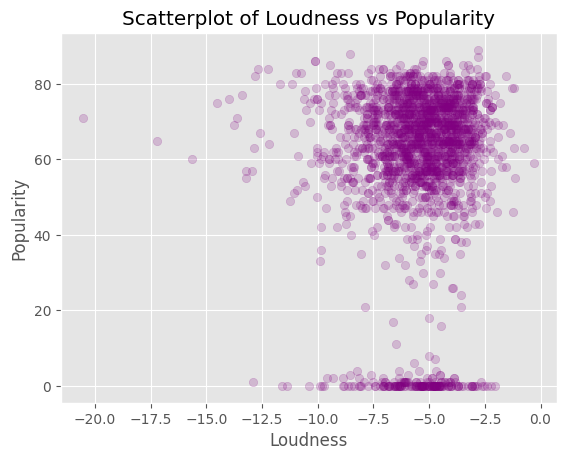

In [10]:
plt.scatter(Spotify_Songs['loudness'], Spotify_Songs['popularity'], color= 'purple', alpha=0.2)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Scatterplot of Loudness vs Popularity')
plt.savefig('plot2.png')
plt.show()

In this Scatterplot, the insight we can see there's a positive correlation between loudness and popularity indicating that loudness ina song does increase its popularity. It is important to note that there is a cluster of outliers at the bottom of the graph, indicating that while loudness has an influence on song popularity, there can be other factors that also affect song popularity.

Finally, I am choosing to analyze the relationship between valence and popularity and visualize it in a scatterplot as it would be the best choice to show if there is a correlation between two numerical variables.

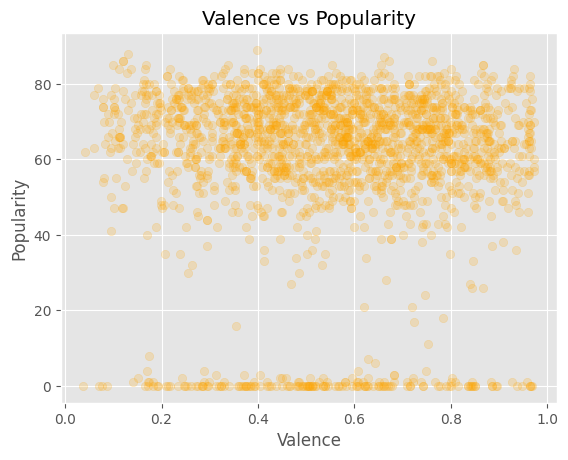

In [11]:
plt.scatter(Spotify_Songs['valence'], Spotify_Songs['popularity'], color='orange', alpha=0.2)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Valence vs Popularity')
plt.savefig('plot5.png')
plt.show()


In this Scatterplot, the insight we can see there's no correlation between valence and popularity indicating that Valence song does not have a direct influence/impact on song popularity. It is important to note that there is a cluster of outliers at the bottom of the graph, indicating that there can be other factors that go into determining the popularity of a song.

I chose a box plot to look at the popularity distribution over the years. A histogram or bar plot would not clearly show the popularity distribution over all the years in the dataset as opposed to if I chose to focus on a specific year. Then a scatterplot plot also would be hard to showcase the popularity distribution over the years as it would be more suitable for two purely numerical variables.

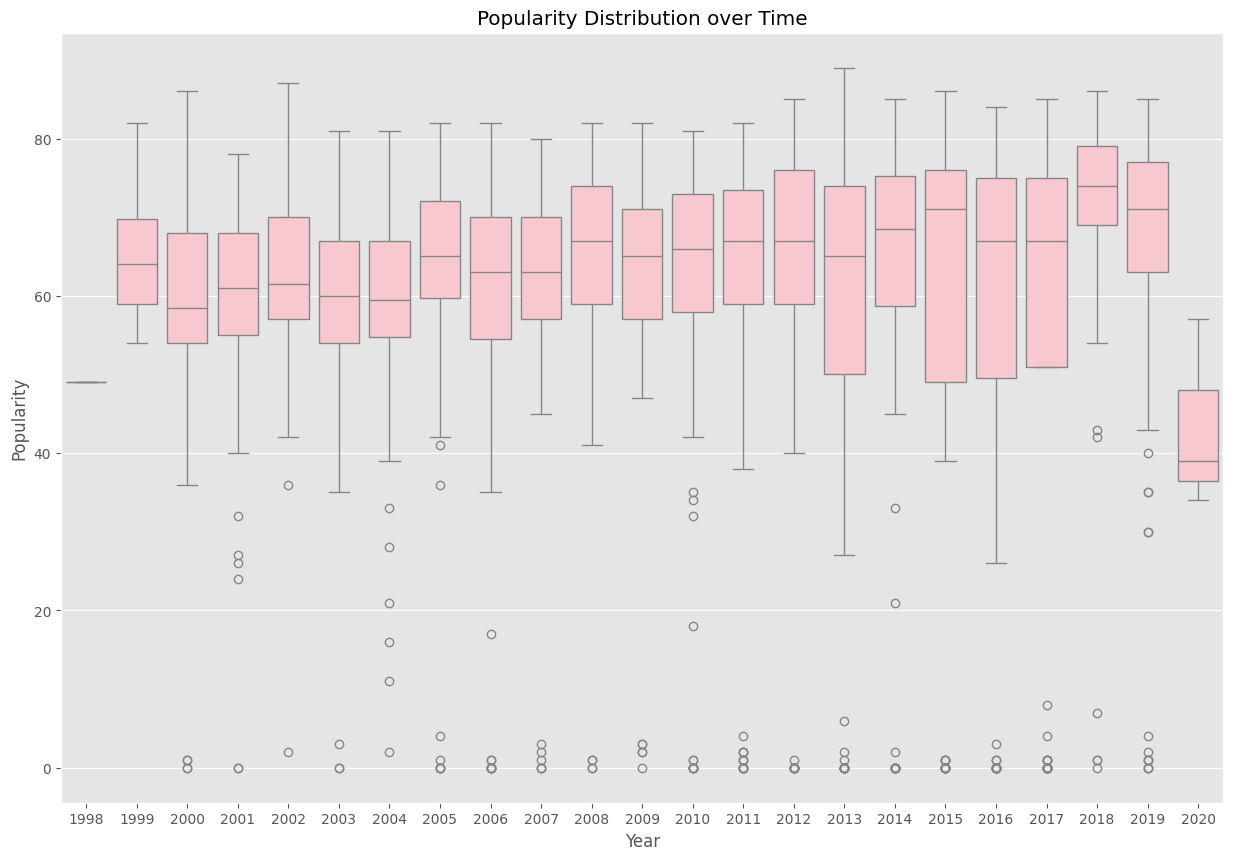

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='year', y='popularity', data=Spotify_Songs, color='pink')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity Distribution over Time')
plt.savefig('plot7.png')
plt.show()


In this Box plot, the insight we can see is that in the year 2013 had the highest popularity distribution variability. This indicates that there could have been lots of influential releases and music trends peaks that reached the audiences during that year. Overall, the popularity distribution is spread out evenly between the ranges of years except for 2020 which had the lowest variability potentially due to the COVID-19 pandemic as there may have been less songs that were released. There are also outliers in each of the years in the range which shows that even if there is a low popularity for a song, that it is still included to have for song diversity as the song may appeal to a smaller audience supporting the idea that spotify wants to cater to all user's music preferences.

# Conclusion

## Key Findings:
Popularity distribution shows variability over the years, with some outliers in the distribution contributing to the diversity in the range of songs available to its user audience.Then, the positive relationship between loudness and popularity suggests that louder songs tend to be more popular, and indicates that it has a higher influence in determining song popularity as opposed to other variables.Finally, the weak relationship between valence and popularity indicates that valence does not affect a song's popularity, and indicates that valence alone does not influence the popularity of a song.

## Recommendations for Further Research
In the finding for there not being a correlation between valence and popularity, it would be important to analyze on other attributes or features suc as energy, instrumentalness, tempo or danceability. Then, it would be important to collect more recent and up to date data to be able to inform the analysis on any recent changes to song popularity. Finally, it also be important to find data on the number of streams for the songs in the dataset to enhance the analysis for song popularity.
